In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.cm as cm

import scipy
import scipy.cluster.hierarchy as sch
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
from IPython.core.display import display, HTML
from datetime import datetime, timedelta
pd.set_option('display.float_format', '{:.5g}'.format)

###################librerias propias

import Data_Manager as MgClus
import Algos_Clustering as AlClus


In [2]:
############### Carga datos

df = pd.read_csv('Datos.csv',delimiter=';',index_col='Timestamp',decimal=',')
df.index = pd.to_datetime(df.index)
print(df.shape)

(16813, 175)


In [3]:
############### retorna primeras 3 semanas
Gmeses=df.groupby(pd.TimeGrouper('W'))
Historial=[]
for W,(dateW,groupW) in enumerate(Gmeses):
    if(W > 3):
        df=pd.concat(Historial)
        break
    Historial.append(groupW)

print(df.shape)

(7820, 175)


/home/arbey/env35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [4]:
############### Retornos logaritmicos 
Datos=MgClus.DataManager(df)
Datos.Compute()

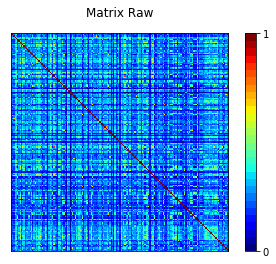

In [5]:
################ Matriz de correlaciones, covarianzas, Distancias
Datos.plot_matrix('Matrix Raw')


0


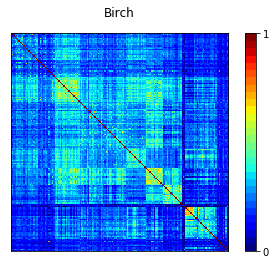

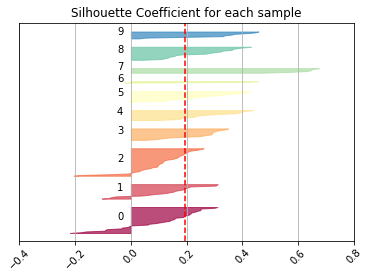

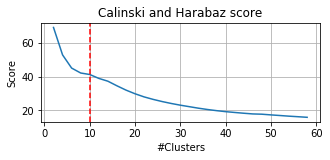

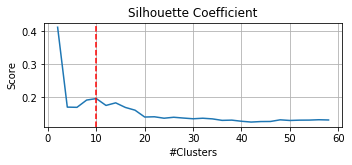

1


/home/arbey/env35/lib/python3.5/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


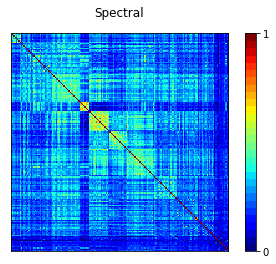

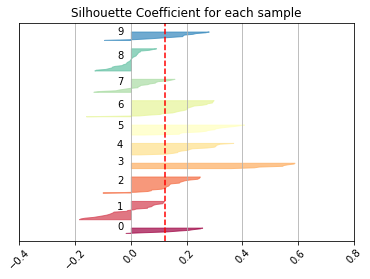

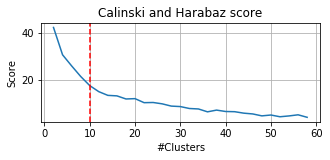

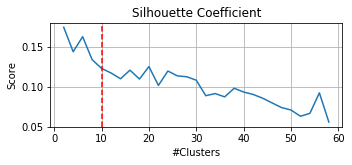

2


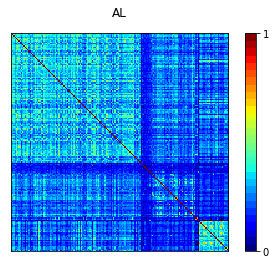

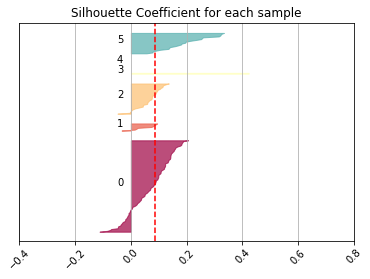

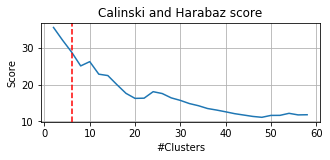

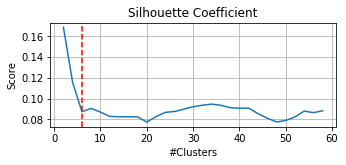

3


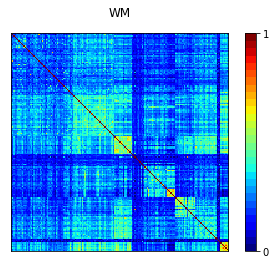

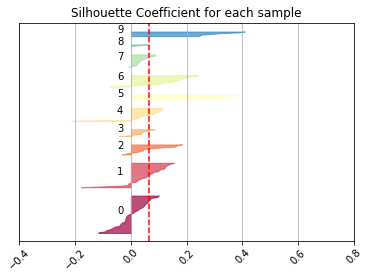

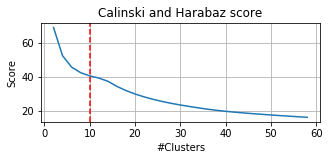

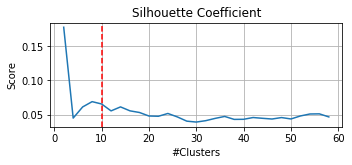

4


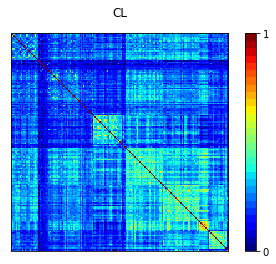

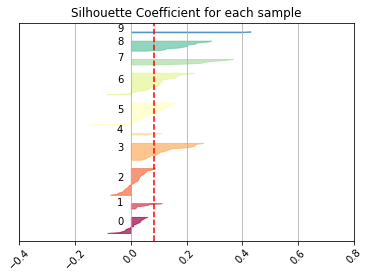

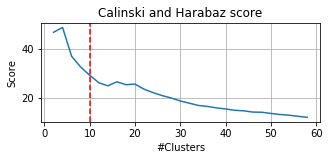

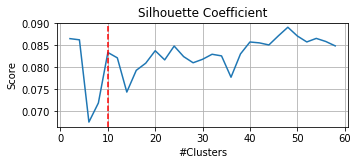

5


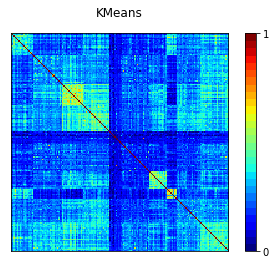

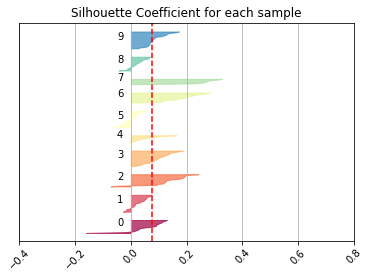

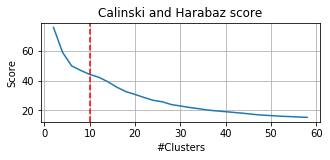

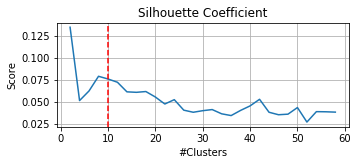

6


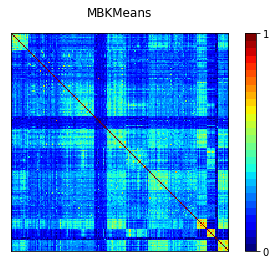

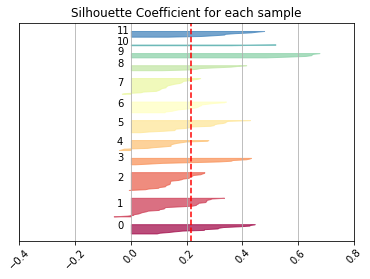

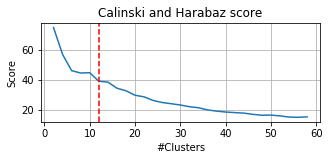

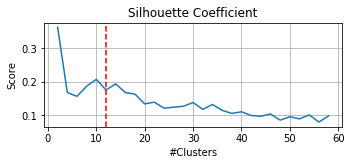

7


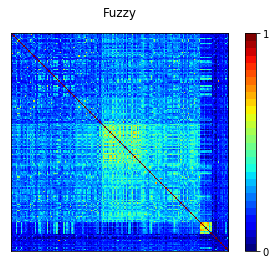

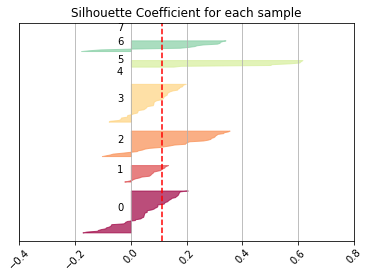

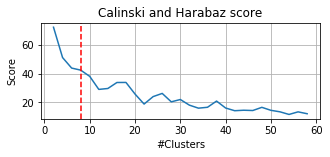

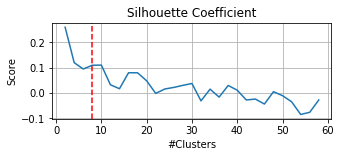

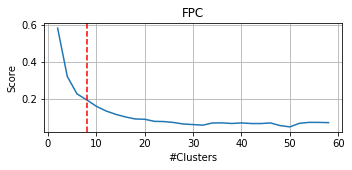

In [6]:
MgClusters=AlClus.ClusterManager()
MgClusters.TestTrainAndPlot(Datos)

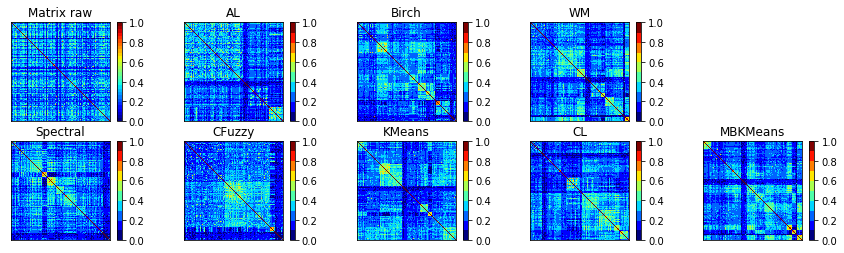

In [7]:
MgClusters.MatrixArrayPlot(Datos.D0,'Matrix raw')

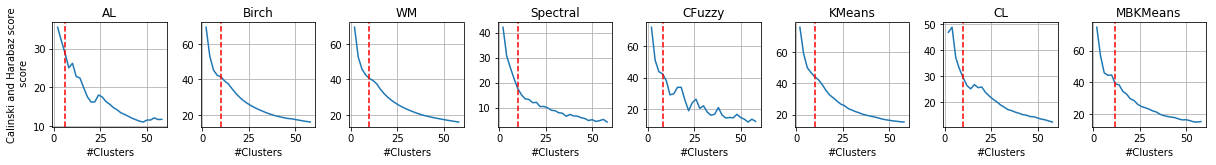

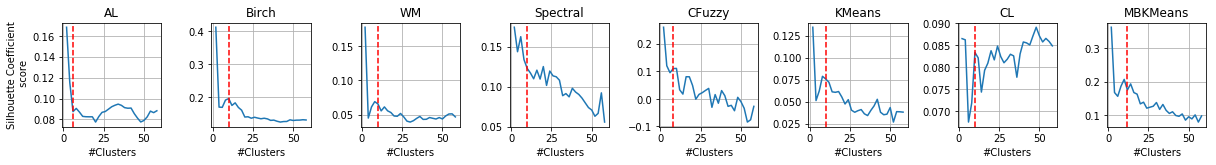

In [8]:
MgClusters.Calinski_SilhouetteArrayPlot()

/home/arbey/env35/lib/python3.5/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


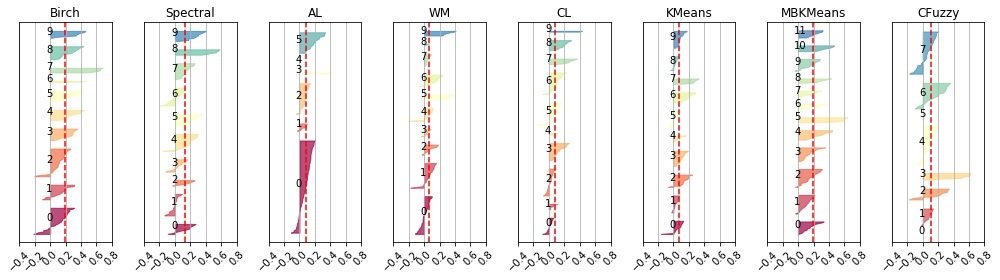

In [9]:
MgClusters.SilhouettePlotArray(Datos)